In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from numpy import array, diag, dot, maximum, empty, repeat, ones, sum
from numpy.linalg import inv
from scipy.stats import cauchy


In [2]:
# Importing the data, display in table
data = np.genfromtxt('/Users/megha/Desktop/facerecognition.dat',
                    skip_header=0,
                    names=True,
                    delimiter=' ')

facedata = pd.DataFrame(data, columns = ['match','eyediff','nosecheekdiff','variabilityratio'])
print(facedata)

      match   eyediff  nosecheekdiff  variabilityratio
0       1.0  0.009683       0.027914          1.086204
1       1.0  0.027614       0.017821          0.989840
2       1.0  0.015367       0.025832          1.010983
3       1.0  0.013371       0.024048          1.012724
4       1.0  0.011428       0.017801          1.044396
5       1.0  0.068605       0.050388          0.950818
6       1.0  0.009241       0.016042          1.006726
7       1.0  0.030349       0.014708          1.018679
8       1.0  0.031075       0.069050          1.030790
9       0.0  0.007211       0.099909          0.928950
10      1.0  0.069537       0.032553          1.033917
11      1.0  0.058680       0.181977          1.038102
12      1.0  0.024301       0.168968          1.047433
13      1.0  0.017598       0.017453          1.030791
14      1.0  0.044744       0.016948          1.043411
15      1.0  0.081175       0.048825          0.945078
16      1.0  0.001031       0.058073          0.979672
17      1.

In [3]:
# Question 1a: Implementing the IRLS algorithm using start value of
# 0.95913
iters = 40
y = facedata['match'].to_numpy().reshape(1042,1)
z = facedata['eyediff'].to_numpy().reshape(1042,1)
n = z.size
ones = np.ones((1042,1))
Z = np.hstack((ones,z))

w = np.zeros((n,n))
pival = np.linspace(0,0,n)
betaval = np.array([.0,.0]).reshape(2,1)
betaval[0,0] = 0.95913

tablelist = []

for i in range(5):
    pival = (1/(1 + np.exp(-1*Z.dot(betaval)))).reshape(n,1)
    fill = pival*(1-pival)
    np.fill_diagonal(w,fill)
    Hessian = inv(np.linalg.multi_dot((Z.T,w,Z)))
    f = Z.T.dot(y-pival)
    update = Hessian.dot(f)
    betaval = betaval + update
    data_value = [i,betaval,Hessian]
    tablelist.append(data_value)
print()

# Formatting the results into a data frame like Table 2.1
print('Table 2.1 for Beta_0 = 0.95913, Beta_1 = 0')
df = pd.DataFrame(tablelist, columns = ['Iteration, t', 'Beta', 'Hessian'])
df = df.style.hide_index()
df = df.set_table_styles([dict(selector = 'th', props=[('text-align', 'center')])])
df


Table 2.1 for Beta_0 = 0.95913, Beta_1 = 0


"Iteration, t",Beta,Hessian
0,[[ 1.72028763] [-13.90963144]],[[ 0.01096355 -0.11774922] [-0.11774922 2.24636741]]
1,[[ 1.75721969] [-13.38389891]],[[ 0.01376919 -0.14444378] [-0.14444378 2.43426036]]
2,[[ 1.75870063] [-13.40003398]],[[ 0.01399076 -0.14439871] [-0.14439871 2.40178607]]
3,[[ 1.75870116] [-13.40003968]],[[ 0.01400062 -0.1445039 ] [-0.1445039 2.40316643]]
4,[[ 1.75870116] [-13.40003968]],[[ 0.01400062 -0.14450394] [-0.14450394 2.40316692]]


In [4]:
# Question 1b: Implement the IRLS algorithm with the start value 0
iters = 40
y = facedata['match'].to_numpy().reshape(1042,1)
z = facedata['eyediff'].to_numpy().reshape(1042,1)
n = z.size
ones = np.ones((1042,1))
Z = np.hstack((ones,z))

w = np.zeros((n,n))
pival = np.linspace(0,0,n)
betaval = np.array([.0,.0]).reshape(2,1)
betaval[0,0] = 0.0

tablelist2 = []

for i in range(5):
    pival = (1/(1 + np.exp(-1*Z.dot(betaval)))).reshape(n,1)
    fill = pival*(1-pival)
    np.fill_diagonal(w,fill)
    Hessian = inv(np.linalg.multi_dot((Z.T,w,Z)))
    f = Z.T.dot(y-pival)
    update = Hessian.dot(f)
    betaval = betaval + update
    data_value = [i,betaval,Hessian]
    tablelist2.append(data_value)
    
print()

# Formatting the results in a dataframe similar to Table 2.1
print('Table 2.1 for Beta_0 = 0, Beta_1 = 0')
df = pd.DataFrame(tablelist2, columns = ['Iteration, t', 'Beta', 'Hessian'])
df = df.style.hide_index()
df = df.set_table_styles([dict(selector = 'th', props=[('text-align', 'center')])])
df


Table 2.1 for Beta_0 = 0, Beta_1 = 0


"Iteration, t",Beta,Hessian
0,[[ 1.5016127 ] [-11.14408376]],[[ 0.00878375 -0.09433803] [-0.09433803 1.79973903]]
1,[[ 1.74440309] [-13.26669118]],[[ 0.01246462 -0.12936371] [-0.12936371 2.21900238]]
2,[[ 1.75865273] [-13.3995696 ]],[[ 0.01390619 -0.14355394] [-0.14355394 2.39141906]]
3,[[ 1.75870116] [-13.40003968]],[[ 0.0140003 -0.14450065] [-0.14450065 2.40312566]]
4,[[ 1.75870116] [-13.40003968]],[[ 0.01400062 -0.14450394] [-0.14450394 2.40316692]]


Text(0, 0.5, 'B_1')

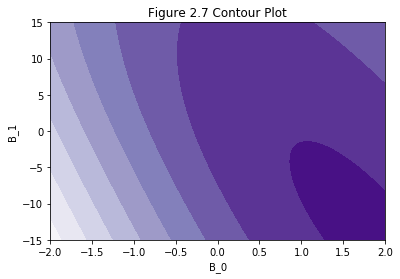

In [5]:
# Question 1c: Making a contour plot like Figure 2.7

# Creating the mesh grid
npoints = 100
beta_0 = np.linspace(-2,2,npoints)
beta_1 = np.linspace(-15,15,npoints)

b_0, b_1 = np.meshgrid(beta_0, beta_1)

# Creating log-likelihood function

def loglikelihood(y, Z, beta1, beta2):
    ones = np.ones((1042,1))
    beta = np.array([beta1, beta2]).reshape(2,1)
    pi = (1/(1+np.exp(-1*Z.dot(beta)))).reshape(y.size,1)
    b = -np.log(1-pi)
    return np.linalg.multi_dot((y.T,Z,beta))-b.T.dot(ones)
Zmesh = np.zeros((beta_0.shape[0], beta_1.shape[0]))
for i in range(beta_0.shape[0]):
    for j in range(beta_1.shape[0]):
        b0 = b_0[i,j]; b1 = b_1[i,j]
        Zmesh[i,j] = loglikelihood(y,Z,b0,b1)
        
# Creates the figure
plt.figure()
plt.contourf(beta_0,beta_1,Zmesh, cmap='Purples')
plt.title('Figure 2.7 Contour Plot')
plt.xlabel('B_0')
plt.ylabel('B_1')

Root is at:  -0.19228646762465867
lcauchy(x) at root is:  -72.91581961584615

When I changed the start value between the given values, I only got accurate results at 0 and -1. Using the mean of the data as a start point did not give accurate results.


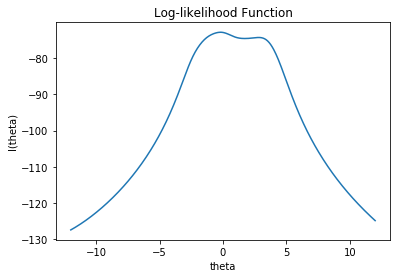

In [6]:
# Question 2.1 on page 54 of Computational Statistics book

# Question 2.1a: Graph the log-likelihood function and find the MLE 

x = np.array([1.77,-0.23,2.76,3.8,3.47,56.75,-1.34,4.24,-2.44,3.29,3.71,-2.40,4.53,-0.07,-1.05,-13.87,-2.53,-1.75,0.27,43.21])

def cauchy(x,theta):
    return 1/(np.pi*(1+(x-theta)**2))

def lcauchy(x, theta):
    n = x.size
    f = -np.log([1+(x[i]-theta)**2 for i in range(n)]).sum(axis=0)
    return -n*np.log(np.pi) + f

def lprimecauchy(x,theta):
    n = x.size
    f = []
    for i in range(n):
         f.append(2*(x[i]-theta)/((x[i]-theta)**2+1))
    return sum(f)
         
def l2primecauchy(x,theta):
    n = x.size
    f = []
    for i in range(n):
         f.append((-2*(theta**2-2*theta*x[i]+x[i]**2-1))/((theta**2-2*theta*x[i]+x[i]**2+1)**2))
    return sum(f)
         
def h(x,theta):
    return lprimecauchy(x,theta)/l2primecauchy(x,theta)
         

domain = np.linspace(-12,12,400)
plt.figure()
plt.plot(domain, lcauchy(x,domain))
plt.title('Log-likelihood Function')
plt.xlabel('theta')
plt.ylabel('l(theta)')

# Finding the MLE for theta using the Newton-Raphson method.
samplemean = x.mean()

def dx(lcauchy,x,theta):
    return abs(0-lcauchy(x,theta))

def newtons_method(lprimecauchy, l2primecauchy, x0, theta, e):
    delta = dx(lprimecauchy, x0,theta)
    while delta > e:
        theta = theta + lprimecauchy(x0,theta)/l2primecauchy(x0,theta)
        delta = dx(lprimecauchy, x0,theta)
    print('Root is at: ', theta)
    print('lcauchy(x) at root is: ', lcauchy(x0,theta))
    
newtons_method(lprimecauchy,l2primecauchy,x,-1,1e-5)
print()
print('When I changed the start value between the given values, I only got accurate results at 0 and -1. Using the mean of the data as a start point did not give accurate results.')

In [7]:
# Question 2.1b: Apply the bisection method with starting points -1 and 1.

def samesign(a,b):
    return a*b > 0 

def bisection(lprimecauchy,low,high):
    assert not samesign(lprimecauchy(x,low),lprimecauchy(x,high))
    midpoint = (low + high) / 2.0
    for i in range(20):
        if samesign(lprimecauchy(x,low), lprimecauchy(x,midpoint)):
            low = midpoint
        else:
            high = midpoint
        midpoint = (low + high) / 2.0
        
    return midpoint

gmax = bisection(lprimecauchy,-1,1)
print('The global maximum of the cauchy distribution (result from the bisection algorithm):')
print(gmax)
print('A scenario in which the bisection method would not work would be if your maximum was not within   the interval.')

The global maximum of the cauchy distribution (result from the bisection algorithm):
-0.19228649139404297
A scenario in which the bisection method would not work would be if your maximum was not within   the interval.


In [8]:
# Question 2.1c: Apply fixed-point iterations starting from -1 with scaling choices of 1, 0.64
# and 0.25

k=0
alphavals = [1, 0.64, 0.25]

for alpha in alphavals:
    theta = -1
    while lprimecauchy(x,theta)>0.000000000001:
        theta = theta + alpha*lprimecauchy(x,theta)
        k+=1
    print('The Fixed Point estimate for alpha = %.2f is:' %alpha,theta)
print()
print('The only alpha value that gave an accurate estimate was alpha = 0.25.')

The Fixed Point estimate for alpha = 1.00 is: 0.9214155618890301
The Fixed Point estimate for alpha = 0.64 is: 0.22970595960897922
The Fixed Point estimate for alpha = 0.25 is: -0.19228661322974042

The only alpha value that gave an accurate estimate was alpha = 0.25.


In [9]:
# Question 2.1d: Apply the secant method to estimate theta.

ai = [-3,-2,-1,0]
bi = [3,-1,0,2]

for i in range(len(ai)):
    k=0
    x_0 = ai[i]
    x_1 = bi[i]
    x_2 = x_0+x_1
    fx0 = lprimecauchy(x,x_0); fx1 = lprimecauchy(x,x_1)
    while abs((x_0-x_1))>0.000000000000001:
        x_2 = x_1 - lprimecauchy(x,x_1)*(x_1-x_0)/(lprimecauchy(x,x_1) - lprimecauchy(x,x_0))
        x_0=x_1; x_1=x_2; fx0=fx1; fx1 = lprimecauchy(x,x_2)
        k+=1
    print('The Secant Estimate for [%.2f,%.2f]: '%(ai[i],bi[i]),x_2)
print('When (-3,3) and (0,2) are the starting points, the Secant estimate is not  accurate. For the starting points (-2,-1) and (-1,0) the secant estimate is correct.')

The Secant Estimate for [-3.00,3.00]:  2.8174721655731316
The Secant Estimate for [-2.00,-1.00]:  -0.19228661322965113
The Secant Estimate for [-1.00,0.00]:  -0.19228661322965102
The Secant Estimate for [0.00,2.00]:  1.713586834809589
When (-3,3) and (0,2) are the starting points, the Secant estimate is not  accurate. For the starting points (-2,-1) and (-1,0) the secant estimate is correct.


In [10]:
print('Question 2.1e: Compare the speed and stability of all the methods used.')
print()
print('While all of the methods had similar speeds, I would say that the Newton-Raphson method is the    most stable. This is because the bisection algorithm, secant method, and fixed-point iterations do not work accurately each time, it depends on the starting values.')

Question 2.1e: Compare the speed and stability of all the methods used.

While all of the methods had similar speeds, I would say that the Newton-Raphson method is the    most stable. This is because the bisection algorithm, secant method, and fixed-point iterations do not work accurately each time, it depends on the starting values.


The area of the gamma distribution between the lower and upper bounds is: 0.951207104273593
The number of iterations done in order to get the correct area: 3283
The lower boundary is: 0.06705406129286677
The upper boundary is: 4.827892413086407


Text(4, 0.05, 'The upper bound \n of the interval')

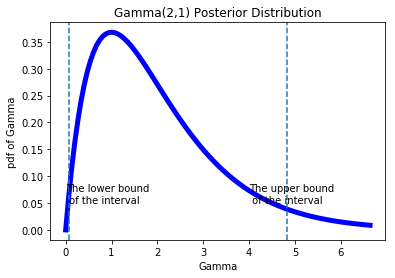

In [11]:
# Question 2.4: Gamma Distribution
from scipy.stats import gamma

a=2
dom = np.linspace(gamma.ppf(0.0,a), gamma.ppf(0.99,a), 100)
probs = gamma.pdf(dom,a)
maxprob = np.max(probs)
xmax = np.argmax(probs)
plt.figure()
plt.plot(dom,probs,lw=5,color='b')


k=0
stepsize = maxprob/10000
stepsize = 0.0001
area = 0
maxiters = 10000

while (area<=0.950000 and k<maxiters):
    probability = maxprob - k*stepsize
    vals = np.abs(probs - probability)
    left = vals[0:xmax]
    right = vals[xmax:-1]
    l_min = np.argmin(left)
    r_min = np.argmin(right)
    l = dom[l_min]
    r = dom[r_min+len(left)]
    area = gamma.cdf(r,a) - gamma.cdf(l,a)
    k+=1
    
print('The area of the gamma distribution between the lower and upper bounds is:',area)
print('The number of iterations done in order to get the correct area:',k)
print('The lower boundary is:',l)
print('The upper boundary is:',r)

plt.title('Gamma(2,1) Posterior Distribution')
plt.xlabel('Gamma')
plt.ylabel('pdf of Gamma')
plt.axvline(l, linestyle="dashed")
plt.axvline(r, linestyle = "dashed")
plt.annotate("The lower bound \n of the interval", (0,0.05))
plt.annotate("The upper bound \n of the interval", (4,0.05))